# Keyword Ranking Fluctuation Analysis

The dataset consists of keywords, their categories, and their ranks over multiple timestamps. Each row represents a keyword, while the columns represent its rank at different times. Some cells contain missing values ("-" or blanks), indicating that the keyword was not ranked at that time.

# Keyword Fluctuation Analysis - Decoding the Patterns


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [ ]:
# Load the 'Data' sheet into a DataFrame to inspect the keyword rankings
data_df = pd.read_excel('/content/Copy of Fluctuation Analysis -- Evaluation Sheet .xlsx', sheet_name='Data')

# Display the first few rows to understand its structure
data_df.head()


,Keywords,Category,2024-01-19 00:00:00,2024-01-19 00:00:00.1,2024-01-18 00:00:00,2024-01-18 00:00:00.1,2024-01-17 00:00:00,2024-01-17 00:00:00.1,2024-01-16 00:00:00,2024-01-15 00:00:00,...,2024-01-02 00:00:00,2024-01-02 00:00:00.1,2024-01-02 00:00:00.2,2024-01-02 00:00:00.3,2024-01-02 00:00:00.4,2024-01-01 00:00:00,2024-01-01 00:00:00.1,2024-01-01 00:00:00.2,2024-01-01 00:00:00.3,2024-01-01 00:00:00.4
0,emi card online apply,EMI Card,2,2,2,2,2,2,2,2,...,3,3,3,3,3,3,3,3,3,3
1,debit card emi shopping,EMI Card,17,17,17,18,18,19,18,13,...,21,23,23,23,23,21,21,21,21,21
2,debit card emi shopping app,EMI Card,16,14,13,16,16,14,13,11,...,19,19,19,19,19,19,19,19,18,18
3,EMI Card,EMI Card,2,2,2,2,2,2,2,1,...,2,2,2,2,2,2,2,2,2,2
4,emi card apply,EMI Card,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2



# The use of statistical measures like Variance and Standard Deviation can help access the rank fluctuations over time.

In [ ]:
# Convert all rank columns to numeric, coercing errors to NaN for blank or invalid values
rank_columns = data_df.columns[2:]
data_df[rank_columns] = data_df[rank_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
# Calculate fluctuation metrics for each keyword: variance and standard deviation
data_df['Variance'] = data_df[rank_columns].var(axis=1, skipna=True)
data_df['Std Dev'] = data_df[rank_columns].std(axis=1, skipna=True)

In [ ]:
pd.set_option('display.float_format', '{:.6f}'.format)
fluctuation_summary = data_df[['Keywords', 'Category', 'Variance', 'Std Dev']].sort_values(by='Std Dev', ascending=False)

In [ ]:
fluctuation_summary.head(10)

,Keywords,Category,Variance,Std Dev
1042,amazon shopping upi money transfer new,UPI,18432.000000,135.764502
1067,paytm upi money transfer recharge app,UPI,18050.000000,134.350288
945,mobile recharge transfer app,Recharge,9810.333333,99.047127
1805,best sbi mutual fund,Mutual Fund,8180.000000,90.443352
1455,e wallet,Wallet,8085.909437,89.921685
1469,new lpg gas connection,Utility Bills,7203.000000,84.870490
918,mobile recharge mobile top up,Recharge,7089.333333,84.198179
293,vehicle fastag app,Fastag,6904.982143,83.096222
1884,tax on fd interest,Fixed Deposit,6523.071429,80.765534
1356,hp lpg gas app,Utility Bills,6480.916667,80.504141


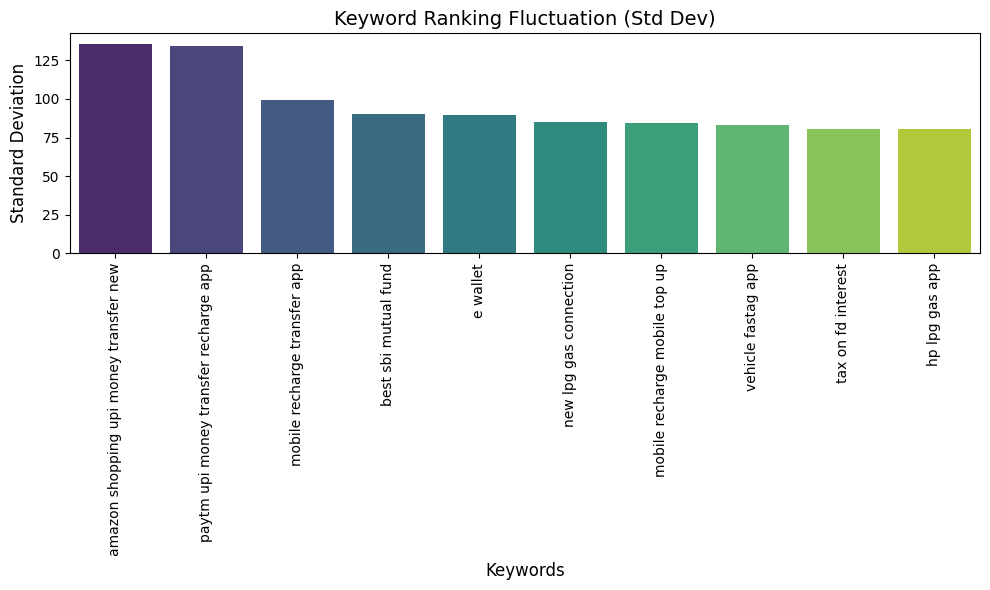

In [ ]:
df = pd.DataFrame(fluctuation_summary.head(10))
plt.figure(figsize=(10, 6))
sns.barplot(x='Keywords', y='Std Dev', data=df, palette='viridis')
plt.title('Keyword Ranking Fluctuation (Std Dev)', fontsize=14)
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Standard Deviation', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

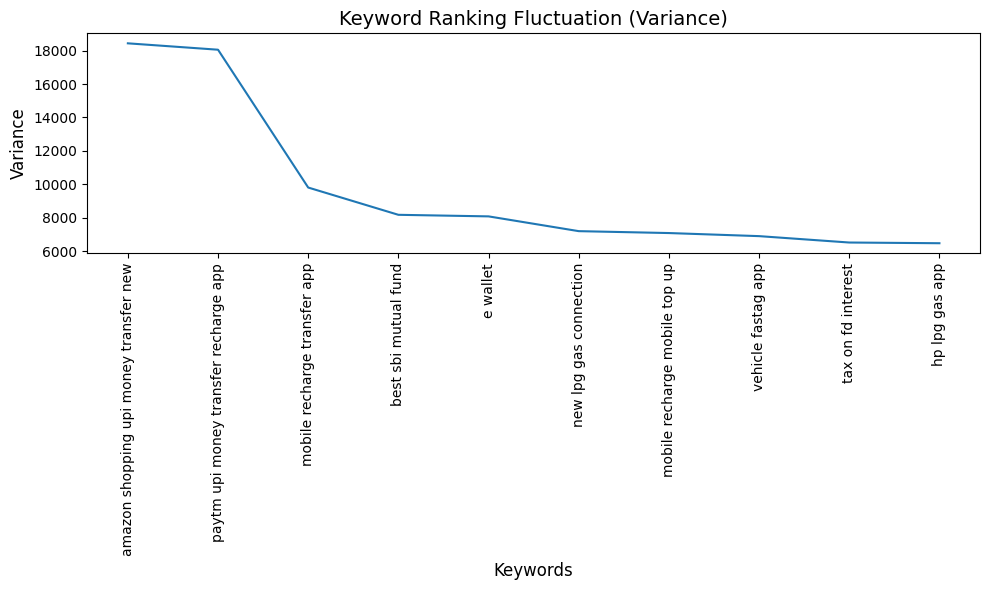

In [ ]:
df = pd.DataFrame(fluctuation_summary.head(10))
plt.figure(figsize=(10, 6))
sns.lineplot(x='Keywords', y='Variance', data=df, palette='viridis')
plt.title('Keyword Ranking Fluctuation (Variance)', fontsize=14)
plt.xlabel('Keywords', fontsize=12)
plt.ylabel('Variance', fontsize=12)
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
fluctuation_summary = data_df[['Keywords', 'Category', 'Variance', 'Std Dev']].sort_values(by='Std Dev', ascending=True)
fluctuation_summary.head()

,Keywords,Category,Variance,Std Dev
2226,lic term insurance,Insurance,0.0,0.0
1125,upi loan app,UPI,0.0,0.0
145,rbl card,Credit Card,0.0,0.0
601,loan against insurance policy,Loan,0.0,0.0
1743,emi card offer app,EMI Card,0.0,0.0


The fluctuation analysis shows that certain keywords, particularly related to UPI (Unified Payment Interface), exhibit the highest standard deviation, indicating significant volatility in their rankings over time.

**IMPORTANT INSIGHTS**:

1. **High Fluctuation Keywords**: Keywords like "amazon shopping upi money transfer new" and "paytm upi money transfer recharge app" have very high fluctuations (standard deviation above 130).These keywords are mostly in the UPI and Recharge categories.

2. High standard deviation indicates that these keywords experience frequent and large changes in rank. Low-variance keywords, such as those in more stable categories like "EMI Card," have less rank fluctuation.

# Highlight the Keywords whose ranking has been improved over time.

In [ ]:
# Calculate the first and last available rank for each keyword (ignoring NaN values)
data_df['First Rank'] = data_df[rank_columns].bfill(axis=1).iloc[:, 0]  # First non-NaN value per row
data_df['Last Rank'] = data_df[rank_columns].ffill(axis=1).iloc[:, -1]  # Last non-NaN value per row

# Identify improvement: last rank is better (numerically smaller) than the first rank
data_df['Improved'] = data_df['Last Rank'] < data_df['First Rank']

# Filter out improved keywords
improved_keywords = data_df[data_df['Improved'] == True][['Keywords', 'Category', 'First Rank', 'Last Rank']]

improved_keywords.head(10)

,Keywords,Category,First Rank,Last Rank
5,emi card eligibility,EMI Card,3.000000,2.000000
6,emi card in india,EMI Card,3.000000,2.000000
20,apply for instant credit card,Credit Card,38.000000,27.000000
22,Credit card,Credit Card,191.000000,189.000000
23,credit card against fd,Credit Card,16.000000,15.000000
24,credit card app,Credit Card,211.000000,195.000000
27,credit card apply app,Credit Card,30.000000,27.000000
29,credit card apply online,Credit Card,41.000000,40.000000
30,credit card balance check app,Credit Card,148.000000,42.000000
36,credit card canara bank app,Credit Card,161.000000,140.000000


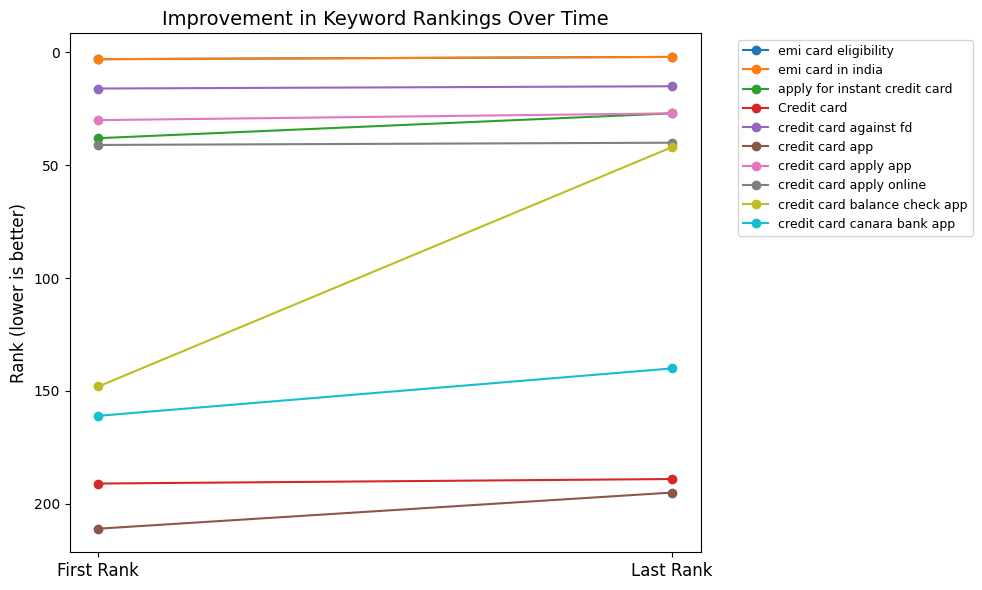

In [ ]:
improved_df = pd.DataFrame(improved_keywords.head(10))
plt.figure(figsize=(10, 6))
for index, row in improved_df.iterrows():
    plt.plot([0, 1], [row['First Rank'], row['Last Rank']], marker='o', label=row['Keywords'])

# Add customizations
plt.xticks([0, 1], ['First Rank', 'Last Rank'], fontsize=12)
plt.ylabel('Rank (lower is better)', fontsize=12)
plt.title('Improvement in Keyword Rankings Over Time', fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis because lower rank values are better
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=9)

# Show plot with proper layout
plt.tight_layout()
plt.show()

# Category wise trend for keywords Ranking Progression

In [ ]:
# Calculate the average rank per category for each timestamp
category_ranks = data_df.groupby('Category')[rank_columns].mean()

# Calculate the first and last available average rank for each category
category_ranks['First Avg Rank'] = category_ranks.bfill(axis=1).iloc[:, 0]  # First non-NaN value per category
category_ranks['Last Avg Rank'] = category_ranks.ffill(axis=1).iloc[:, -1]  # Last non-NaN value per category

category_ranks['First Avg Rank'].head(10)


,First Avg Rank
Category,
Bill Payment,78.650000
Credit Card,69.387755
EMI Card,6.770833
EMI payment,6.400000
Fastag,133.000000
Fixed Deposit,50.033333
Generic,21.157895
Insurance,99.772727
Investment,66.166667


In [ ]:
category_ranks['Last Avg Rank'].head(10)

,Last Avg Rank
Category,
Bill Payment,78.650000
Credit Card,69.387755
EMI Card,6.770833
EMI payment,6.400000
Fastag,133.000000
Fixed Deposit,50.033333
Generic,21.157895
Insurance,99.772727
Investment,66.166667


In [ ]:
# Calculate the rank improvement: if the last average rank is better than the first
category_ranks['Improvement'] = category_ranks['Last Avg Rank'] < category_ranks['First Avg Rank']

category_ranks['Improvement'].head(10)

,Improvement
Category,
Bill Payment,False
Credit Card,False
EMI Card,False
EMI payment,False
Fastag,False
Fixed Deposit,False
Generic,False
Insurance,False
Investment,False


In [ ]:
# Filter categories that showed growth (where Improvement is True)
growing_categories = category_ranks[category_ranks['Improvement'] == True][['First Avg Rank', 'Last Avg Rank']]

growing_categories.head()

,First Avg Rank,Last Avg Rank
Category,,


# Since, the last average rank is not smaller than the first, the category has not improved in terms of keyword rankings. so no category has shown improvement.